### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt

### Read Data

In [2]:
# Trajectory data for linear battery dynamics and data-driven mpc
lin_dd = pd.read_csv('trajectory-data-linear-dynamics/dd-mpc-data.csv')
# Trajectory data for linear battery dynamics and simple mpc
lin_simple = pd.read_csv('trajectory-data-linear-dynamics/simple-mpc-data.csv')

# BoxPlot data for nonlinear battery dynamics and data-driven mpc
nonlin_simple = pd.read_csv('box-plot-data-nonlinear-dynamics/box-plots-simple-data.csv')
# BoxPlot data for nonlinear battery dynamics and data-driven mpc
nonlin_dd= pd.read_csv('box-plot-data-nonlinear-dynamics/box-plots-dd-data.csv')


## Plot Trajectories

### Some 📈 functions for later

In [4]:
def plotGridForming(ax, time, power, setpoints, ylabel=''):
    l1, = ax.plot(time, np.ones(2)*power, color='red', label='Power')
    l2, = ax.plot(time, np.ones(2)*setpoints, '--', color='black', label='Setpoint')
    ax.set_ylabel(ylabel)
    return l1, l2

def plotRes(ax, time, power, setpoints, availablePower, predictedPower, ylabel='RES'):
    l1, l2 = plotGridForming(ax, time, power, setpoints, ylabel)
    l3, = ax.plot(time, np.ones(2)*availablePower, ':', color='green',
                  label='Uncertain input')
    l4, = ax.plot(time, np.ones(2)*predictedPower, color='blue', alpha=0.3,
                  label='Prediction') 
    return l1, l2, l3, l4

def plotLoad(ax, time, currentLoad, loadPrediction):
    ax.plot(time, np.ones(2)*currentLoad, color='green')
    ax.plot(time, np.ones(2)*loadPrediction, color='blue', alpha=0.3)
    ax.set_ylabel('Load')
    
def plotEnergy(ax, time, energy, xTildeMin, xTildeMax, ylabel='x'):
    ax.plot(time, np.ones(2)*energy, color='orange', label='Energy')
    ax.fill_between(time, np.ones(2)*xTildeMin, np.ones(2)*xTildeMax,
                    alpha=0.1, color='orange', edgecolor='none')
    ax.set_ylabel(ylabel)

def plotLinePower(ax, time, powerFlow):
    colorMap = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for i in np.arange(powerFlow.size):
        ax.plot(time, np.ones(2)*powerFlow[i], color=colorMap[i])
    ax.set_ylabel('Power flow')

### Plot

In [5]:
# Choose dataset to plot
plot_data = lin_simple

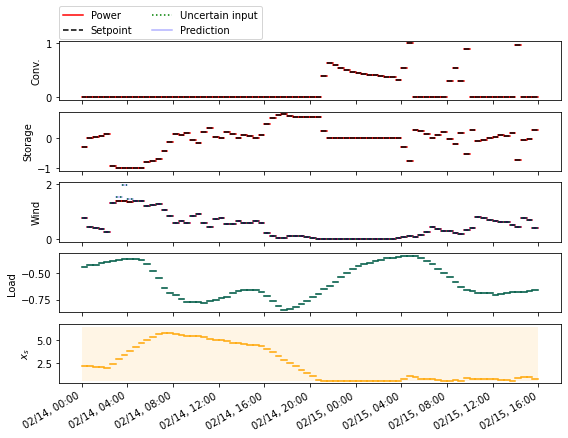

In [6]:
# Plot
fig, axs = plt.subplots(5,1, figsize=(9,7))
time = pd.to_datetime(plot_data['Time'])
currentStoredEnergy = plot_data['StoredEnergy']
for i in range(80):
    plotGridForming(axs[0], np.append(time[i], time[i+1]),plot_data['Input Pt Actual'][i], plot_data['Input Pt Optimal'][i], ylabel='Conv.')
    plotGridForming(axs[1], np.append(time[i], time[i+1]),plot_data['Input Ps Actual'][i], plot_data['Input Ps Optimal'][i], ylabel='Storage')
    plotEnergy(axs[4], np.append(time[i], time[i+1]), currentStoredEnergy[i], 0.5, 6.5, ylabel='$x_{s}$')
    l1, l2, l3, l4 = plotRes(axs[2], np.append(time[i], time[i+1]),plot_data['Input Pr Actual'][i], plot_data['Input Pr Optimal'][i], 
            plot_data['Available RES'][i], plot_data['PreAvailable RES'][i], ylabel='Wind')
    plotLoad(axs[3], np.append(time[i], time[i+1]), plot_data['Load'][i], plot_data['Load'][i])
axs[0].legend(handles = [l1, l2, l3, l4], bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=2, borderaxespad=0.)
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%m/%d, %H:%M'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in plt.gca().get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.gcf().autofmt_xdate()
plt.show()

## Plot BoxPlots

In [7]:
# Choose dataset to plot
plot_data = nonlin_dd
legend_txt = 'Data-Driven MPC'

Text(0.5, 1.0, 'Data-Driven MPC')

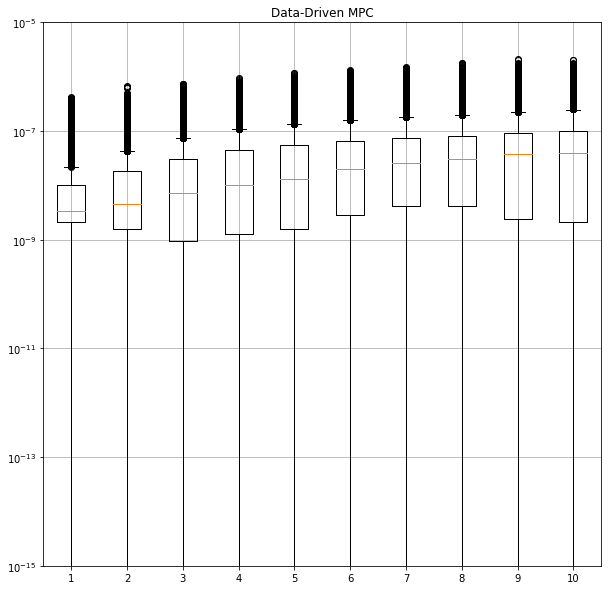

In [8]:
# Steps:
steps = [1,2,3,4,5,6,7,8,9,10]

# Create Figure
fig, axs = plt.subplots(1,1, figsize=(10,10))

# Create list
bp_list = []
for i in range(10):
    bp_list.append(plot_data[f'Step {i}'].to_list())

axs.boxplot(bp_list)
axs.set_yscale('log') 
axs.set_ylim([1e-15,1e-5])  
axs.grid()
axs.set_xticks(steps)
axs.set_title(legend_txt)